In [66]:
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

Importing packages for visualization and importing the dataset to the notebook

In [67]:
data_buildings = pd.read_csv("/Users/bhavyabonam/Downloads/building_inventory.csv")

In [68]:
data_buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


There are few NaN values for Year Acquired, Year Constructed, Usage Description 2 and Usage Description 3, so I am  going to replace that with "Unidentified" as part of data cleaning.

In [69]:
data_buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


As you can see the NaN values have been replaced by Unidentified.

# Removing NaN values and some data cleaning

In [70]:
data_buildings_new = pd.pivot_table(data_buildings,
                                       index=['Congress Dist'],
                                       values=['Square Footage'],
                                       columns=['Agency Name'],
                                       aggfunc=np.sum)

In [71]:
data_buildings_new

Square Footage  \
Agency Name   Appellate Court / Fifth District   
Congress Dist                                    
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
5                                          NaN   
6                                          NaN   
7                                          NaN   
8                                          NaN   
9                                          NaN   
10                                         NaN   
11                                         NaN   
12                                     15124.0   
13                                         NaN   
14                                         NaN   
15                                         NaN   
16                                         NaN   
17                                         NaN   
18                                         NaN   

                                                 \
Agency Name   Appellate Court / Fourth District   
Congress Dist                                     
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                           NaN   
9                                           NaN   
10                                          NaN   
11                                          NaN   
12                                          NaN   
13                                      16400.0   
14                                          NaN   
15                                          NaN   
16                                          NaN   
17                                          NaN   
18                                          NaN   

                                                 \
Agency Name   Appellate Court / Second District   
Congress Dist                                     
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                       43330.0   
9                                           NaN   
10                                          NaN   
11                                          NaN   
12                                          NaN   
13                                          NaN   
14                                          NaN   
15                                          NaN   
16                                          NaN   
17                                          NaN   
18                                          NaN   

                                                                         \
Agency Name   Appellate Court / Third District Chicago State University   
Congress Dist                                                             
0                                          NaN                      NaN   
1                                          NaN                1219492.0   
2                                          NaN                      NaN   
3                                          NaN                      NaN   
4                                          NaN                      NaN   
5                                          NaN                      NaN   
6         

As you can see there are lot of NaN values which might make it difficult in plotting, I am going to try a way professor mentioned in the class to replace those values with a 0

In [72]:
data_buildings_new = data_buildings_new.fillna({'Appellate Court / Fifth District':0, 'Appellate Court / Fourth District':0, 'Appellate Court / Second District': 0, 'Appellate Court / Third District':0, 'Chicago State University':0, 'Department of Agriculture':0, 'Department of Central Management Services':0, 'Department of Corrections':0, 'Department of Human Services':0, 'Department of Juvenile Justice':0, 'Illinois Emergency Management Agency':0, 'Illinois Medical District Commission':0, 'Illinois State University':0, 'Northeastern Illinois University':0, 'Northern Illinois University':0, 'Office of the Attorney General':0, 'Office of the Secretary of State':0, 'Southern Illinois University':0, 'University of Illinois':0, 'Western Illinois University':0 })
data_buildings_new

Square Footage  \
Agency Name   Appellate Court / Fifth District   
Congress Dist                                    
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
5                                          NaN   
6                                          NaN   
7                                          NaN   
8                                          NaN   
9                                          NaN   
10                                         NaN   
11                                         NaN   
12                                     15124.0   
13                                         NaN   
14                                         NaN   
15                                         NaN   
16                                         NaN   
17                                         NaN   
18                                         NaN   

                                                 \
Agency Name   Appellate Court / Fourth District   
Congress Dist                                     
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                           NaN   
9                                           NaN   
10                                          NaN   
11                                          NaN   
12                                          NaN   
13                                      16400.0   
14                                          NaN   
15                                          NaN   
16                                          NaN   
17                                          NaN   
18                                          NaN   

                                                 \
Agency Name   Appellate Court / Second District   
Congress Dist                                     
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                       43330.0   
9                                           NaN   
10                                          NaN   
11                                          NaN   
12                                          NaN   
13                                          NaN   
14                                          NaN   
15                                          NaN   
16                                          NaN   
17                                          NaN   
18                                          NaN   

                                                                         \
Agency Name   Appellate Court / Third District Chicago State University   
Congress Dist                                                             
0                                          NaN                      NaN   
1                                          NaN                1219492.0   
2                                          NaN                      NaN   
3                                          NaN                      NaN   
4                                          NaN                      NaN   
5                                          NaN                      NaN   
6         

I tried to change the NaN values here to 0 so each congress dist will not have a null value for agency name. But it did not change so i am going to try another way

In [73]:
Buildings_data_no_na = []

#To see the agency that pops up for each congress dist, I am matiching the unique values

for i in range(len(data_buildings['Congress Dist'].unique())):
    data_frame = data_buildings.loc[data_buildings['Congress Dist'] == data_buildings['Congress Dist'].unique()[i]]
    for j in range(len(data_buildings['Agency Name'].unique())):
        sum_ = data_frame.loc[data_frame['Agency Name'] == data_buildings['Agency Name'].unique()[j], 'Square Footage'].sum()
        Buildings_data_no_na.append([data_buildings['Congress Dist'].unique()[i],data_buildings['Agency Name'].unique()[j],sum_])
        
Buildings_data_no_na #the unique values are stored in this list

Buildings_data_new = pd.DataFrame(Buildings_data_no_na,columns = ['Congress Dist','Agency Name','Square Footage'])#new df
Buildings_data_new

sq_footage = Buildings_data_new['Square Footage'].to_numpy() #numpy array
sq_footage = sq_footage.reshape(19,35)
sq_footage
#I took reference from this site: https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/ for this code

array([[  402882,  1518546,   247839,   430972,    50974,   386238,
           29350,        0,   151963,        0,   112777,   227480,
               0,        0,   315626,        0,        0,        0,
               0,        0,   385896,        0,        0,    26700,
               0,        0,        0,        0,    60500,        0,
               0,        0,        0,        0,        0],
       [  574690,  2908649,   394598,   838934,    26710,   882286,
           41984,        0,    70160,        0,    98011,   209238,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,  1164674,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0],
       [  577616,  2862863,   206088,   738336,    40242,   342638,
               0,        0,    44130,        0,    11700,        0,
               0,        0,        0,   124235,        0,  3709780

# Grid Heat Map

Creating the color scale for my map now using bqplot's gridheatmap function, and adding the figures to it 

In [74]:
color_scale = bqplot.ColorScale() # Starting up with just a color scale
heat_map_buildings = bqplot.GridHeatMap(color = sq_footage, 
                              scales = {'color': color_scale})
buildings_fig = bqplot.Figure(marks = [heat_map_buildings]) #placing marks
color_scale = bqplot.ColorScale(scheme = "Reds")# Giving a color schema and a colorbar
color_axis = bqplot.ColorAxis(scale = color_scale, 
                        orientation = 'vertical', 
                        side = 'right')
heat_map_buildings = bqplot.GridHeatMap(color = sq_footage, 
                              scales = {'color': color_scale})
buildings_fig = bqplot.Figure(marks = [heat_map_buildings], axes = [color_axis])# Plotting the axis
x_scale = bqplot.OrdinalScale()
y_scale = bqplot.OrdinalScale()

x_axis = bqplot.Axis(scale = x_scale)# Adding axis to x and y lable
y_axis = bqplot.Axis(scale = y_scale, 
                   orientation = 'vertical')
heat_map_buildings = bqplot.GridHeatMap(color = sq_footage, 
                              scales = {'color': color_scale, 
                                        'row': y_scale,
                                        'column':x_scale})
buildings_fig = bqplot.Figure(marks = [heat_map_buildings], 
                    axes = [color_axis, y_axis, x_axis])


buildings_fig #figure



Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right'), Axis(orientatio…

When I click on it, it does not do anything so I will add some interactivity 

In [75]:
color_scale = bqplot.ColorScale(scheme = "Blues") #Changed the heat map's color because red seem too serious :P
x_scale = bqplot.OrdinalScale() #Adding scales 
y_scale = bqplot.OrdinalScale()

color_axis = bqplot.ColorAxis(scale = color_scale, #axis
                        orientation = 'vertical', 
                        side = 'right')
x_axis = bqplot.Axis(scale = x_scale)
y_axis = bqplot.Axis(scale = y_scale, 
                   orientation = 'vertical')

heat_map_buildings = bqplot.GridHeatMap(color = sq_footage,
                              scales = {'color': color_scale,
                                        'row': y_scale,
                                        'column': x_scale},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'yellow'}, # whenever I click on the box it turns yellow (some interaction right there)
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 0.8})

buildings_fig = bqplot.Figure(marks = [heat_map_buildings], 
                    axes = [color_axis, y_axis, x_axis])

buildings_fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Blues'), side='right'), Axis(orientati…

Now, to make it more interactive I am going to write a function (with help of prep_notebook),  so when i click on a box/cell, a number shows up and it different for each cell, and the number keeps changing when you click on different cells

In [76]:
heat_map_buildings.selected

#This fuction is useful to link the map to other figure I make 

mySelectedLabel = ipywidgets.Label()
def get_data_value(change): #it means when you click on a cell get so and so value
    i,j = change['owner'].selected[0]
    v = sq_footage[i,j] # data value
    mySelectedLabel.value = str(v)
    line_buildings.y = sq_foot[i:j]
    
heat_map_buildings = bqplot.GridHeatMap(color = sq_footage,
                              scales = {'color': color_scale,
                                        'row': y_scale,
                                        'column': x_scale},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'yellow'}, 
                              selected_style = {'opacity': 0.9},
                              unselected_style = {'opacity': 0.7})

heat_map_buildings.observe(get_data_value, 'selected')

buildings_fig = bqplot.Figure(marks = [heat_map_buildings], 
                    axes = [color_axis, y_axis, x_axis])

ipywidgets.VBox([mySelectedLabel, buildings_fig]) #figure

This heat map is interactive, when you click on a cell the value shows up and that works for every cell, each cell different values.

# Line Plot

This is the function I used in Assignment 2 which professor asked us to refer for sum of total square footage and a normal line plot



In [77]:
data_buildings_by_year_acquired = data_buildings.groupby("Year Acquired") 

Total_square_footage_per_year = data_buildings_by_year_acquired["Square Footage"].sum()
Total_square_footage_per_year

#By doing both groupby and sum fucntion i was able to get the total square footage acquired for a particular year

Year Acquired
0       1106855
1753       1200
1802       4440
1810       4033
1832     120000
         ...   
2015     305093
2016     304839
2017       6720
2018      17160
2019       1520
Name: Square Footage, Length: 172, dtype: int64

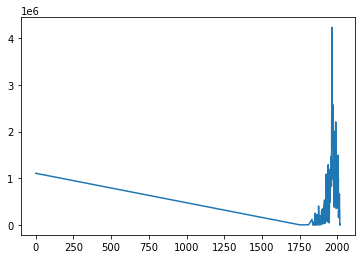

In [78]:
plt.plot(Total_square_footage_per_year)
plt.show()

We know now that just like we did for the data used in heat map we need to do some data cleaning as well like some of the years are have 0 values and we need to remove them. We will be creating a line plot

In [79]:
from bqplot import pyplot
line_plot_buildings = data_buildings.groupby('Year Acquired').sum().reset_index()
buildings_data_line_plot = line_plot_buildings[line_plot_buildings['Year Acquired'] != 0]

sq_foot = buildings_data_line_plot['Square Footage'].to_numpy() #numpy array

figure_buildings = bqplot.pyplot.figure(title='Square Footage for that Year')
axes_options = {'x': {'label': 'Year Acquired', 'tick_format': '0.0f'},
                'y': {'label': 'Square Footage', 'tick_format': '0.0f'}}
line_buildings = bqplot.pyplot.plot(x =buildings_data_line_plot['Year Acquired'], y = sq_foot, axes_options= axes_options)
figure_buildings




Figure(axes=[Axis(label='Year Acquired', scale=LinearScale(), tick_format='0.0f'), Axis(label='Square Footage'…

If we keep the x and y axes static that will not make any sense, as the heat map has different values, the each one will be different from another and having on static plot will not be a good thing to do. 

Now I am going to create a dashboard with the heat map and the line plot and the dashboard will be interactive with line plot changing each time you click on any cell. 

In [80]:
buildings_fig.layout.min_width='500px' #I can select 600px and more but we have to scroll to see the maps and below 500 is too conjusted hence sticking to 500px
figure_buildings.layout.min_width='500px'

both_figures = ipywidgets.HBox([buildings_fig, figure_buildings])#combining both figures (not literslly but placing them next to each othet)


myDashboard = ipywidgets.VBox([mySelectedLabel, both_figures])
myDashboard

# I would have definetly experimented with more colors, the pink heat map from professor one of the notebook was amazing, i am only guessing thats because of the data being different, anyway i would have tried multiple colors or a more appealing colorm, afterall this is data viz. Also, from one of the notebook the scatter plot looked good i was thinking about a dashboard where instead of just clicking on one thing (like heatmap) we can click on both and the information changes in other and likewise. I would have tried maybe a histogram because the way it looks
